# Visualizing Time Series Data in Python

Time series data is omnipresent in the field of Data Science. Whether it is analyzing business trends, forecasting company revenue or exploring customer behavior, every data scientist is likely to encounter time series data at some point during their work. To get you started on working with time series data, this notebook will provide practical knowledge on visualizing time series data using Python.

## Table of Contents

- [Introduction](#intro)
- [Summary Statistics and Diagnostics](#sum)
- [Seasonality, Trend and Noise](#season)
- [Work with Multiple Time Series](#multi)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc28/"

---
<a id='intro'></a>

## Introduction

## Load your time series data

The most common way to import time series data in Python is by using the pandas library. You can use the `read_csv()` from pandas to read the contents of a file into a DataFrame. This can be achieved using the following command: `df = pd.read_csv("name_of_your_file.csv")`.

Once your data is loaded into Python, you can display the first rows of your DataFrame by calling the `.head(n=5)` method, where n=5 indicates that you want to print the first five rows of your DataFrame.

In this exercise, you will read in a time series dataset that contains the number of "great" inventions and scientific discoveries from 1860 to 1959, and display its first five rows.

In [2]:
# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv(path+'ch1_discoveries.csv')

# Display the first five lines of the DataFrame
print(discoveries.head())

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


## Test whether your data is of the correct type

When working with time series data in pandas, any date information should be formatted as a `datetime64` type. Therefore, it is important to check that the columns containing the date information are of the correct type. You can check the type of each column in a DataFrame by using the `.dtypes` attribute. Fortunately, if your date columns come as strings, epochs, etc... you can use the `to_datetime()` function to convert them to the appropriate datetime64 type: `df['date_column'] = pd.to_datetime(df['date_column'])`.

In this exercise, you will learn how to check the data type of the columns in your time series data and convert a date column to the appropriate datetime type.

In [3]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


## Your first plot!

Let's take everything you have learned so far and plot your first time series plot. You will set the groundwork by producing a time series plot of your data and labeling the axes of your plot, as this makes the plot more readable and interpretable for the intended audience.

matplotlib is the most widely used plotting library in Python, and would be the most appropriate tool for this job. Fortunately for us, the pandas library has implemented a `.plot()` method on Series and DataFrame objects that is a wrapper around `matplotlib.pyplot.plot()`, which makes it easier to produce plots.

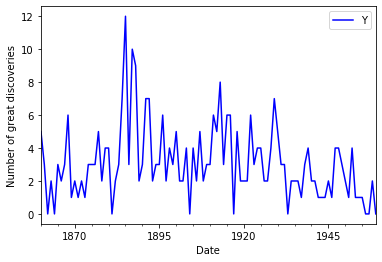

In [4]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show();

## Specify plot styles

The matplotlib library also comes with a number of built-in stylesheets that allow you to customize the appearance of your plots. To use a particular style sheet for your plots, you can use the command `plt.style.use(your_stylesheet)` where your_stylesheet is the name of the style sheet.

In order to see the list of available style sheets that can be used, you can use the command `print(plt.style.available)`. For the rest of this course, we will use the awesome fivethirtyeight style sheet.

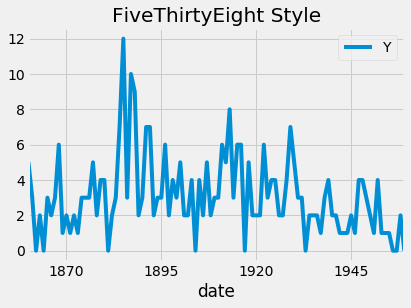

In [5]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show();

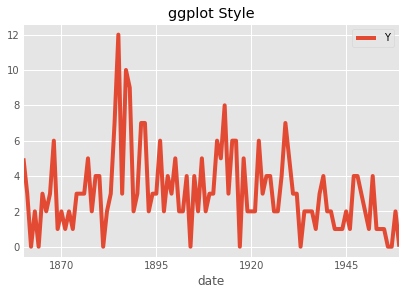

In [6]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show();

## Display and label plots

As you saw earlier, if the index of a pandas DataFrame consists of dates, then pandas will automatically format the x-axis in a human-readable way. In addition the `.plot()` method allows you to specify various other parameters to tailor your time series plot (color of the lines, width of the lines and figure size).

You may have noticed the use of the notation `ax = df.plot(...)` and wondered about the purpose of the `ax` object. This is because the plot function returns a matplotlib `AxesSubplot` object, and it is common practice to assign this returned object to a variable called `ax`. Doing so also allows you to include additional notations and specifications to your plot such as axis labels.

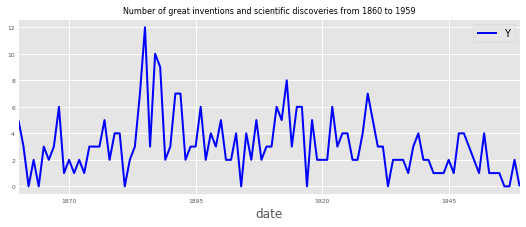

In [7]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show();

## Subset time series data

When plotting time series data, you may occasionally want to visualize only a subset of the data. The pandas library provides powerful indexing and subsetting methods that allow you to extract specific portions of a DataFrame. For example, you can subset all the data between 1950 and 1960 in the discoveries DataFrame by specifying the following date range: `subset_data = discoveries['1950-01-01':'1960-01-01']`.

Note: Subsetting your data this way is only possible if the index of your DataFrame contains dates of the datetime type. Failing that, the pandas library will return an error message.

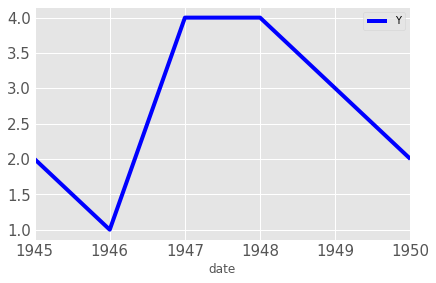

In [8]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945-01-01':'1950-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show();

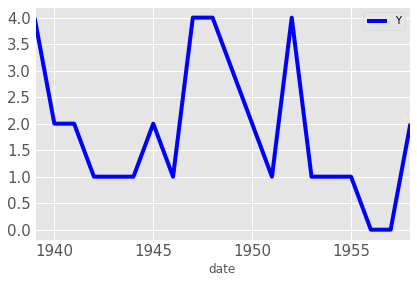

In [9]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939-01-01':'1958-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show();

## Add vertical and horizontal markers

Additional annotations can help further emphasize specific observations or events. Here, you will learn how to highlight significant events by adding markers at specific timestamps of your time series plot. The matplotlib library makes it possible to draw vertical and horizontal lines to identify particular dates.

Recall that the index of the discoveries DataFrame are of the datetime type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating your plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to your plot by using the command: `ax.axvline('1945-01-01', linestyle='--')`.

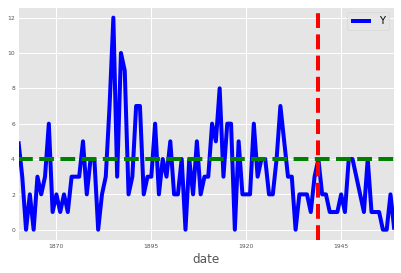

In [10]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show();

## Add shaded regions to your plot

When plotting time series data in Python, it is also possible to highlight complete regions of your time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, you can use the command: `ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5)`.

Here we specified the overall transparency of the region by using the alpha argument (where 0 is completely transparent and 1 is full color).

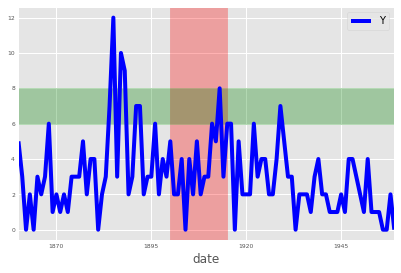

In [11]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show();

---
<a id='sum'></a>

# Summary Statistics and Diagnostics

## Find missing values

In the field of Data Science, it is common to encounter datasets with missing values. This is especially true in the case of time series data, where missing values can occur if a measurement fails to record the value at a specific timestamp. To count the number of missing values in a DataFrame called df that contains time series data, you can use the command: `missing_values = df.isnull().sum()`.

In this exercise, you will learn how to find whether your data contains any missing values.

In [12]:
# Read in the file content in a DataFrame called co2_levels
co2_levels = pd.read_csv(path+'ch2_co2_levels.csv', parse_dates=['datestamp'])

# Display the first five lines of the DataFrame
print(co2_levels.head(8))

   datestamp    co2
0 1958-03-29  316.1
1 1958-04-05  317.3
2 1958-04-12  317.6
3 1958-04-19  317.5
4 1958-04-26  316.4
5 1958-05-03  316.9
6 1958-05-10    NaN
7 1958-05-17  317.5


In [13]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


It looks like the co2_levels DataFrame contains missing values, let's see how we can handle those!

## Handle missing values

In order to replace missing values in your time series data, you can use the command: `df = df.fillna(method="ffill")`, where the argument specifies the type of method you want to use. For example, specifying `bfill` (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while `ffill` (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

Recall from the previous exercise that co2_levels has 59 missing values.

In [14]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


## Display rolling averages (aggregating data)

It is also possible to visualize **rolling averages** of the values in your time series. This is equivalent to **"smoothing"** your data, and can be particularly useful when your time series contains a lot of noise or outliers. For a given DataFrame df, you can obtain the rolling average of the time series by using the command: `df_mean = df.rolling(window=12).mean()`.

The `window` parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to `window=365`. In addition, it is easy to get rolling values for other other metrics, such as the **standard deviation** (`.std()`) or **variance** (`.var()`).

In [15]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()
ma

,co2
datestamp,
1958-03-29,NaN
1958-04-05,NaN
1958-04-12,NaN
1958-04-19,NaN
1958-04-26,NaN
...,...
2001-12-01,370.738462
2001-12-08,370.761538
2001-12-15,370.798077


In [16]:
# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()
mstd

,co2
datestamp,
1958-03-29,NaN
1958-04-05,NaN
1958-04-12,NaN
1958-04-19,NaN
1958-04-26,NaN
...,...
2001-12-01,1.932199
2001-12-08,1.925490
2001-12-15,1.915212


In [17]:
# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

In [18]:
# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

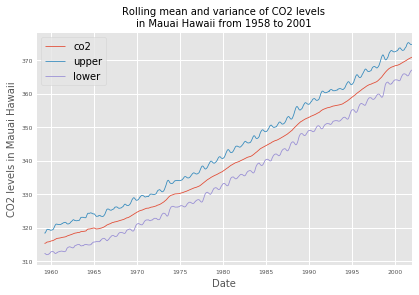

In [19]:
# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show();

## Computing aggregate values of your time series

In [20]:
co2_levels.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='datestamp', length=2284, freq=None)

In [21]:
co2_levels.index.month

Int64Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
            ...
            10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
           dtype='int64', name='datestamp', length=2284)

In [22]:
co2_levels.index.year

Int64Index([1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
            ...
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001],
           dtype='int64', name='datestamp', length=2284)

## Display aggregated values

You may sometimes be required to display your data in a more aggregated form. For example, the co2_levels data contains weekly data, but you may need to display its values aggregated by month of year. In datasets such as the co2_levels DataFrame where the index is a datetime type, you can extract the year of each dates in the index: `index_year = df.index.year`.

To extract the month or day of the dates in the indices of the df DataFrame, you would use `df.index.month` and `df.index.day`, respectively. You can then use the extracted year of each indices in the co2_levels DataFrame and the groupby function to compute the mean CO2 levels by year: `df_by_year = df.groupby(index_year).mean()`.

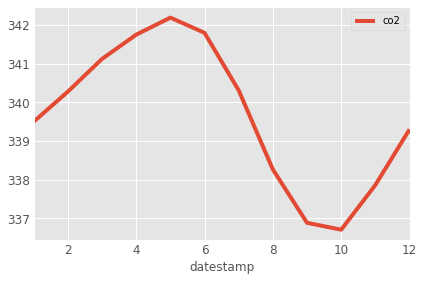

In [23]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
# Using the groupby and mean functions from the pandas library, 
#  compute the monthly mean CO2 levels in the co2_levels DataFrame 
#  and assign that to a new DataFrame called mean_co2_levels_by_month.
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=12)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show();

By plotting the mean CO2 levels data for each month, you can see how CO2 levels are high during the summer months, and lower during the winter months. This is because of the increased sunlight and CO2 production by plants!

## Compute numerical summaries

You have learnt how to display and annotate time series data in multiple ways, but it is also informative to collect **summary statistics of your data**. Being able to achieve this task will allow you to share and discuss statistical properties of your data that can further support the plots you generate. In pandas, it is possible to quickly obtain summaries of columns in your DataFrame by using the command: `print(df.describe())`.

This will print statistics including the mean, the standard deviation, the minima and maxima and the number of observations for all numeric columns in your pandas DataFrame.

In [24]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


It looks like the CO2 levels data has an average value of 340.

## Boxplots and Histograms

Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the `.boxplot()` method on a DataFrame.

Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread. An example of how to generate a histogram is shown below: `ax = co2_levels.plot(kind='hist', bins=100)`.

Here, we used the standard `.plot()` method but specified the kind argument to be `'hist'`. In addition, we also added the `bins=100` parameter, which specifies how many intervals (i.e bins) we should cut our data into.

No handles with labels found to put in legend.


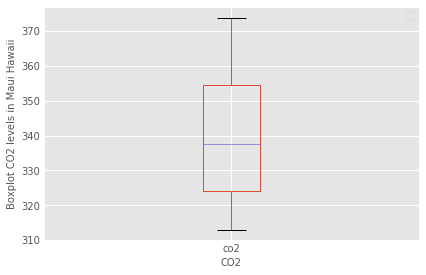

In [25]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show();

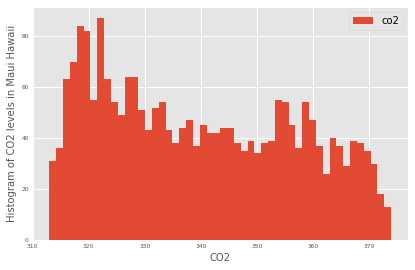

In [26]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show();

## Density plots

In practice, histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, **kernel density plots** represent a more effective way to view the distribution of your data. An example of how to generate a density plot of is shown below: `ax = df.plot(kind='density', linewidth=2)`.

The standard `.plot()` method is specified with the kind argument set to `'density'`. We also specified an additional parameter `linewidth`, which controls the width of the line to be plotted.

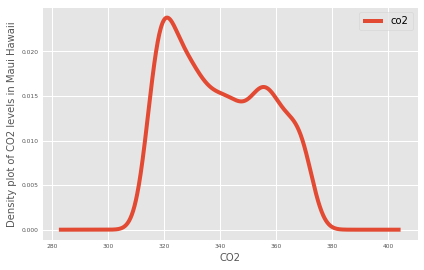

In [27]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show();

---
<a id='season'></a>

## Seasonality, Trend and Noise

**Autocorrelation** is measured as the correlation between a time series and a delayed copy of itself. It is used to find repeating patterns or periodic sygnals in time series data. Sometimes called **autocovariance**.

**Seasonality**: does the data display a clear periodic pattern?

**Trend**: does the data follow a consistent upwards or downwards slope?

**Noise**: are there any outlier points or missing values that are not consistent with the rest of the data?

## Autocorrelation in time series data

In the field of time series analysis, **autocorrelation** refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the **autocorrelation (ACF) plot**, also known as **self-autocorrelation**, to visualize the autocorrelation of a time-series. The `plot_acf()` function in the `statsmodels` library can be used to measure and plot the autocorrelation of a time series.

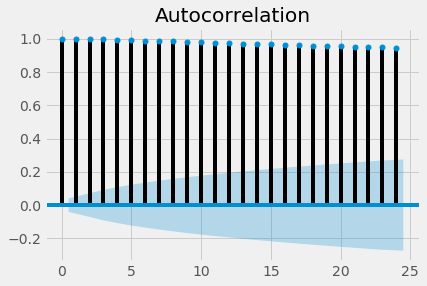

In [28]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show();

**Autocorrelation plots** can be used to quickly `discover patterns` into your time series, so let's delve a little bit deeper into that!

## Interpret autocorrelation plots

If **autocorrelation values** are close to `0`, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to `1` or `-1` indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

In order to help you asses how trustworthy these autocorrelation values are, the `plot_acf()` function also returns **confidence intervals** (represented as `blue shaded regions`). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is **statistically significant**.

In the **autocorrelation plot** above, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant? Answer: They are highly correlated and statistically significant.

## Partial autocorrelation in time series data

Like autocorrelation, the **partial autocorrelation function (PACF)** measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also `removing the effect of previous time points`. For example, a partial autocorrelation function of order 3 returns the correlation between our time series (t_1, t_2, t_3, ...) and its own values lagged by 3 time points (t_4, t_5, t_6, ...), but only after removing all effects attributable to lags 1 and 2.

The `plot_pacf()` function in the `statsmodels` library can be used to measure and plot the **partial autocorrelation** of a time series.

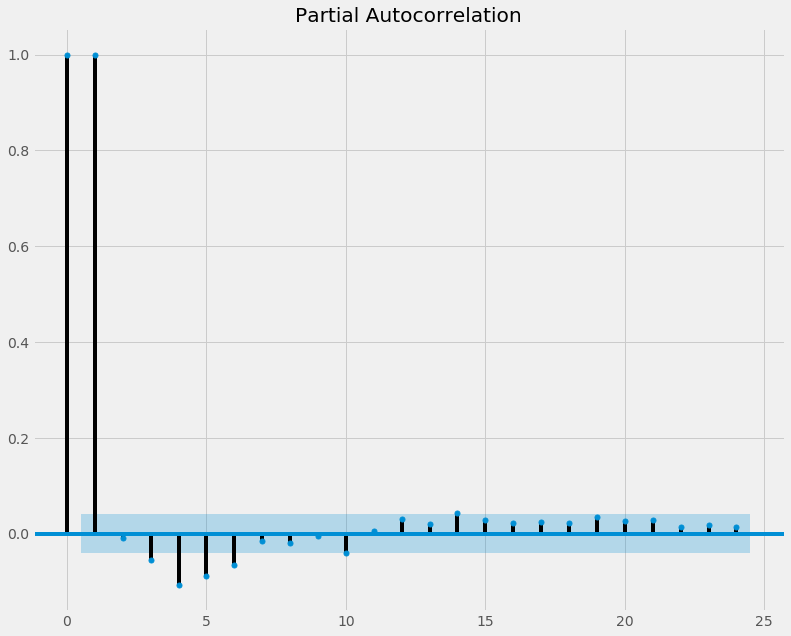

In [29]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)
fig.set_figheight(10)
fig.set_figwidth(12)

# Show plot
plt.show();

Just like autocorrelation, **partial autocorrelation plots** can be `tricky to interpret`, so let's test your understanding of those!

## Interpret partial autocorrelation plots

If **partial autocorrelation** values are close to `0`, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to `1` or `-1` indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The `.plot_pacf()` function also returns **confidence intervals**, which are represented as `blue shaded regions`. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are **statistically significant**.

In the **partial autocorrelation plot** above, at which lag values do we have statistically significant partial autocorrelations? Answer: 0, 1, 3, 4, 5 and 6.

## Time series decomposition
When visualizing time series data, you should look out for some distinguishable patterns:

- **seasonality**: does the data display a clear periodic pattern?
- **trend**: does the data follow a consistent upwards or downward slope?
- **noise**: are there any outlier points or missing values that are not consistent with the rest of the data?

You can rely on a method known as **time-series decomposition** to automatically extract and quantify the structure of time-series data. The `statsmodels` library provides the `seasonal_decompose()` function to perform time series decomposition out of the box: `decomposition = sm.tsa.seasonal_decompose(time_series)`.

You can extract a specific component, for example seasonality, by accessing the `seasonal` attribute of the decomposition object.

In [30]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

                 co2
datestamp           
1958-03-29  1.028042
1958-04-05  1.235242
1958-04-12  1.412344
1958-04-19  1.701186
1958-04-26  1.950694
...              ...
2001-12-01 -0.525044
2001-12-08 -0.392799
2001-12-15 -0.134838
2001-12-22  0.116056
2001-12-29  0.285354

[2284 rows x 1 columns]


Time series decomposition is a powerful method to reveal the structure of your time series. Now let's visualize these components.

## Plot individual components

It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the `observed`, `trend` and `noise` (or `residual, resid`) components.
```
observed = decomposition.observed
trend = decomposition.trend
residuals = decomposition.resid
```
You can then use the extracted components and plot them individually.

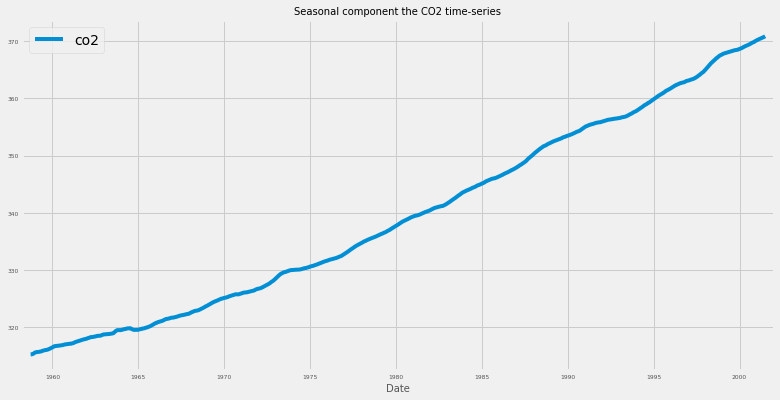

In [31]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show();

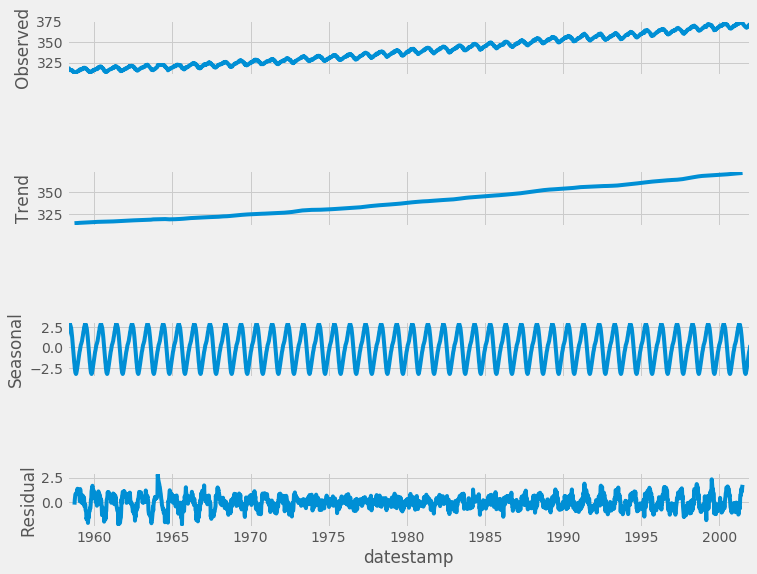

In [32]:
fig = decomposition.plot()
fig.set_figheight(10)
fig.set_figwidth(12)
plt.show();

## Visualize the airline dataset

You will have the opportunity to work with a new dataset that contains the monthly number of passengers who took a commercial flight between January 1949 and December 1960.

In [33]:
# Read in the file content in a DataFrame called airline
airline = pd.read_csv(path+'ch3_airline_passengers.csv', parse_dates=True, index_col='Month')

# Display the first five lines of the DataFrame
print(airline.head())

            AirPassengers
Month                    
1949-01-01            112
1949-02-01            118
1949-03-01            132
1949-04-01            129
1949-05-01            121


In [34]:
print(airline.tail())

            AirPassengers
Month                    
1960-08-01            606
1960-09-01            508
1960-10-01            461
1960-11-01            390
1960-12-01            432


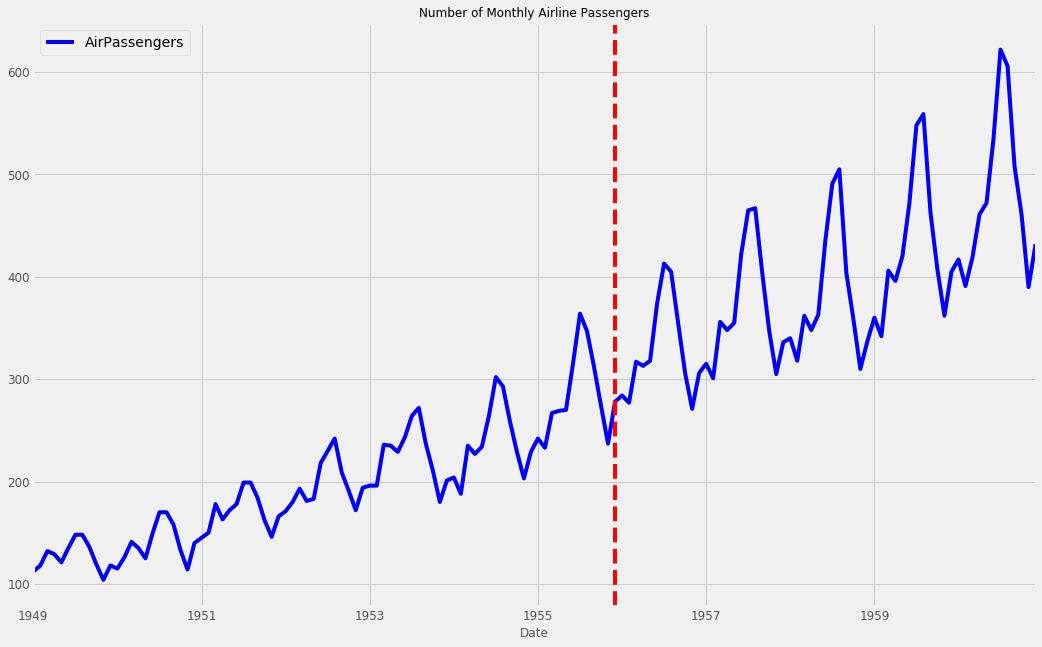

In [35]:
plt.rcParams["figure.figsize"] = (16,10)

# Plot the time series in your dataframe
ax = airline.plot(color="blue", fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show();

The number of airline passengers has risen a lot over time. Can you find any interesting patterns in this time series?

## Analyze the airline dataset

- Check for the presence of missing values, and collect summary statistics of time series data contained in a pandas DataFrame.
- Generate boxplots of your data to quickly gain insight in your data.
- Display aggregate statistics of your data using `groupby()`.

In [36]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


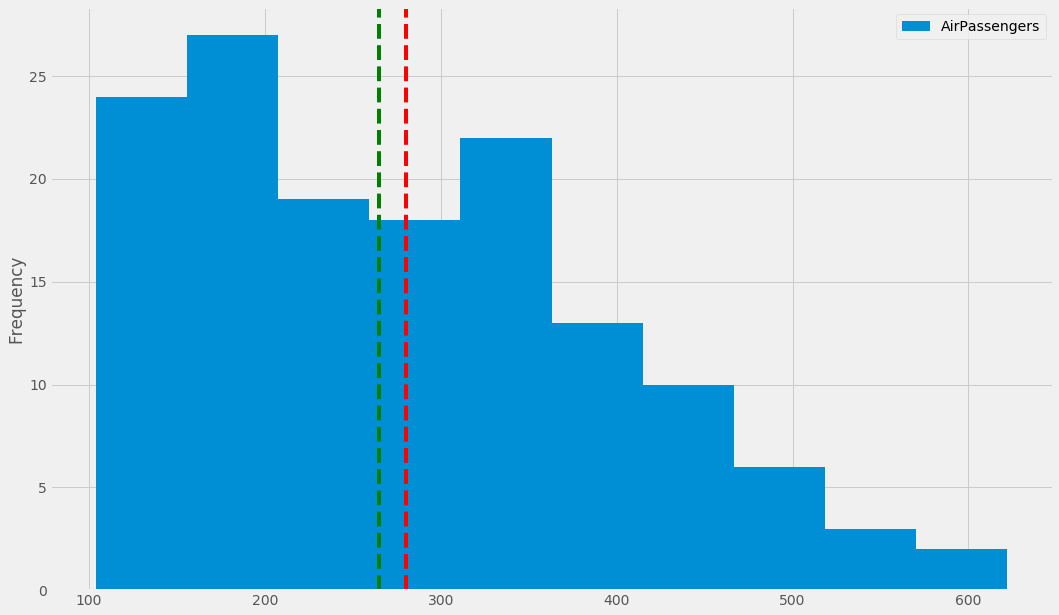

In [37]:
ax = airline.plot(kind='hist')
# Mean
ax.axvline(280, color='red', linestyle='--', label="mean")
# Median
ax.axvline(265, color='green', linestyle='--', label="median")
plt.show();

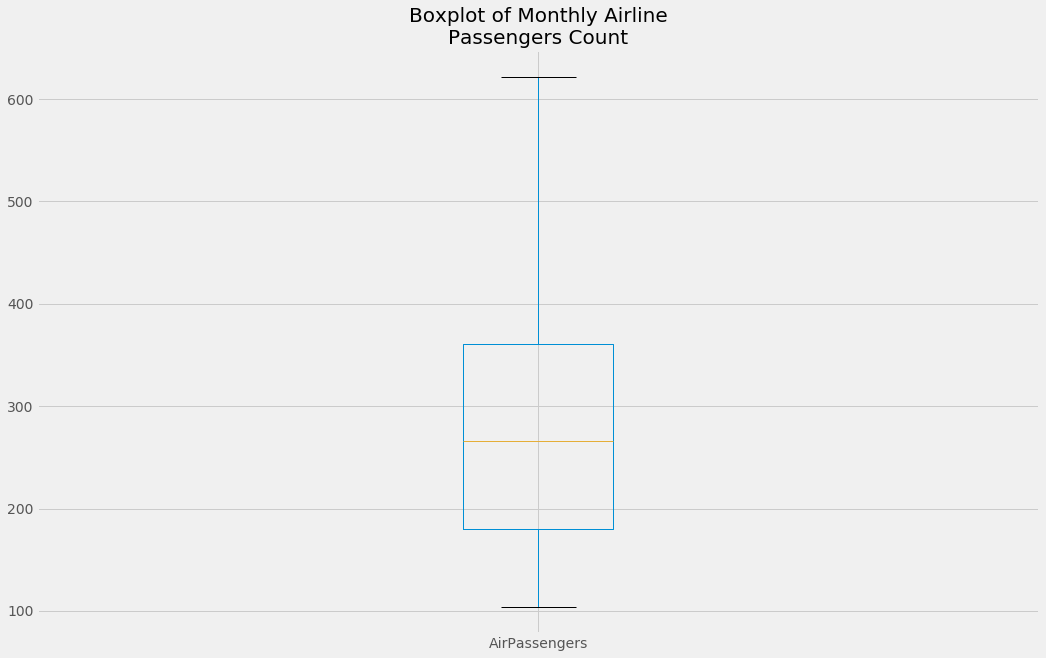

In [38]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show();

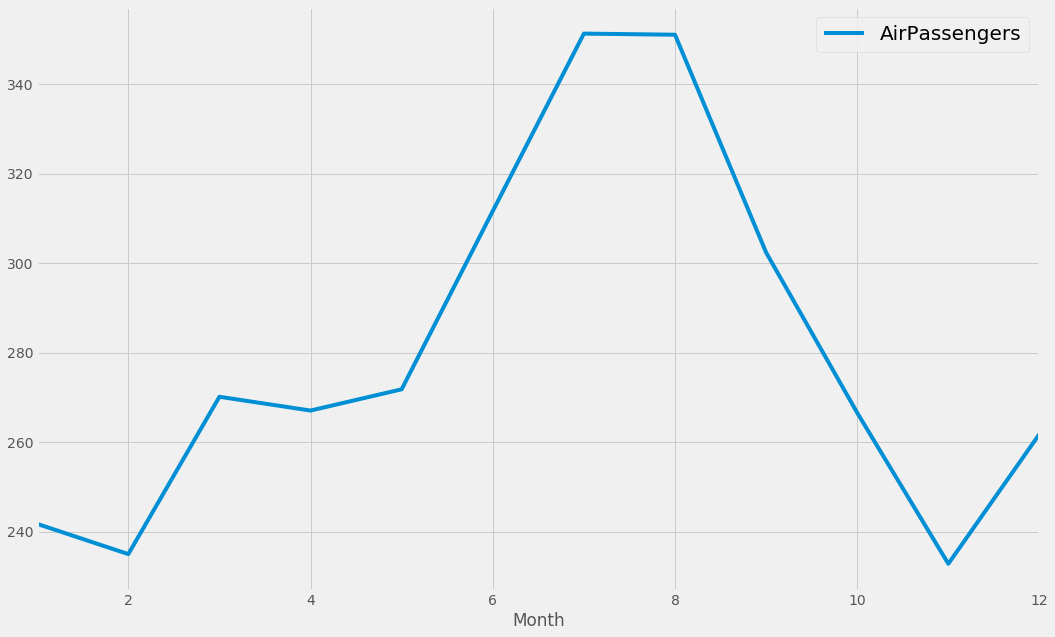

In [39]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show();

Looks like July and August are the busiest months!

## Time series decomposition of the airline dataset

In this exercise, you will apply time series decomposition to the airline dataset, and visualize the trend and seasonal componenets.

In [40]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

noise = decomposition.resid

In [41]:
airline_decomposed = airline.copy()
airline_decomposed['trend'] = trend
airline_decomposed['seasonal'] = seasonal
airline_decomposed['noise'] = noise
airline_decomposed.head()

,AirPassengers,trend,seasonal,noise
Month,,,,
1949-01-01,112,NaN,-24.748737,NaN
1949-02-01,118,NaN,-36.188131,NaN
1949-03-01,132,NaN,-2.241162,NaN
1949-04-01,129,NaN,-8.036616,NaN
1949-05-01,121,NaN,-4.506313,NaN


            AirPassengers  trend   seasonal  noise
Month                                             
1949-01-01            112    NaN -24.748737    NaN
1949-02-01            118    NaN -36.188131    NaN
1949-03-01            132    NaN  -2.241162    NaN
1949-04-01            129    NaN  -8.036616    NaN
1949-05-01            121    NaN  -4.506313    NaN


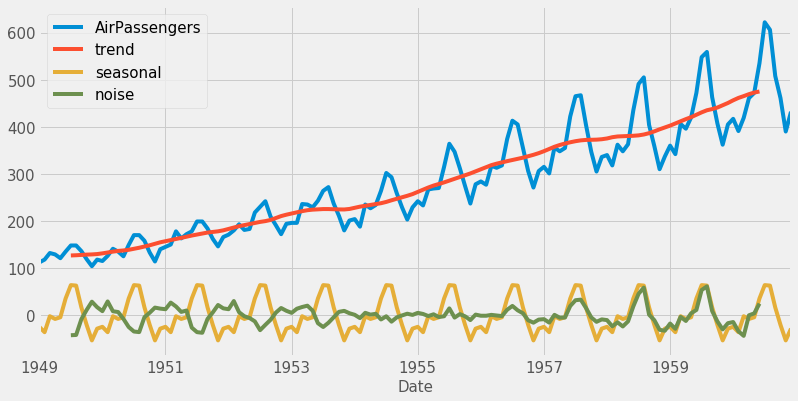

In [42]:
# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show();

---
<a id='multi'></a>

## Work with Multiple Time Series

## Load multiple time series

Whether it is during personal projects or your day-to-day work as a Data Scientist, it is likely that you will encounter situations that require the analysis and visualization of multiple time series at the same time.

Provided that the data for each time series is stored in distinct columns of a file, the pandas library makes it easy to work with multiple time series. In the following exercises, you will work with a new time series dataset that contains the amount of different types of meat produced in the USA between 1944 and 2012.

In [43]:
# Read in the file content in a DataFrame called meat
meat = pd.read_csv(path+'ch4_meat.csv', parse_dates=True, index_col='date')

# Review the first five lines of the meat DataFrame
#print(meat.head(5))

# Convert the date column to a datestamp type
#meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
#meat = meat.set_index('date')

# Display the first five lines of the DataFrame
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


## Visualize multiple time series

If there are multiple time series in a single DataFrame, you can still use the `.plot()` method to plot a line chart of all the time series. Another interesting way to plot these is to use **area charts**. Area charts are commonly used when dealing with multiple time series, and can be used to display `cumulated totals`.

With the pandas library, you can simply leverage the `.plot.area()` method to produce area charts of the time series data in your DataFrame.

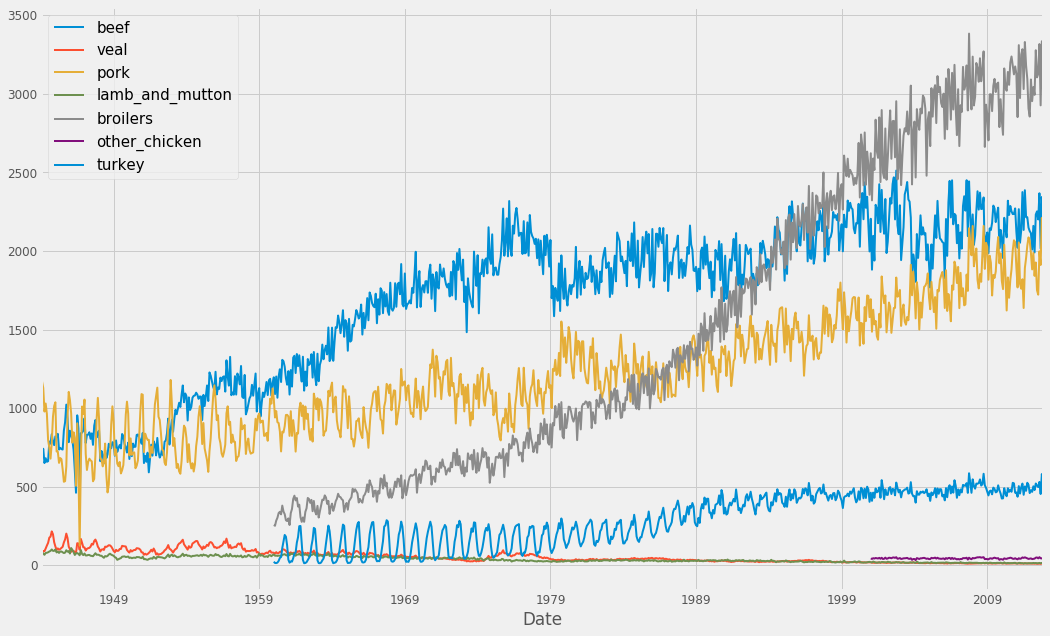

In [44]:
# Plot time series dataset
ax = meat.plot(linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show();

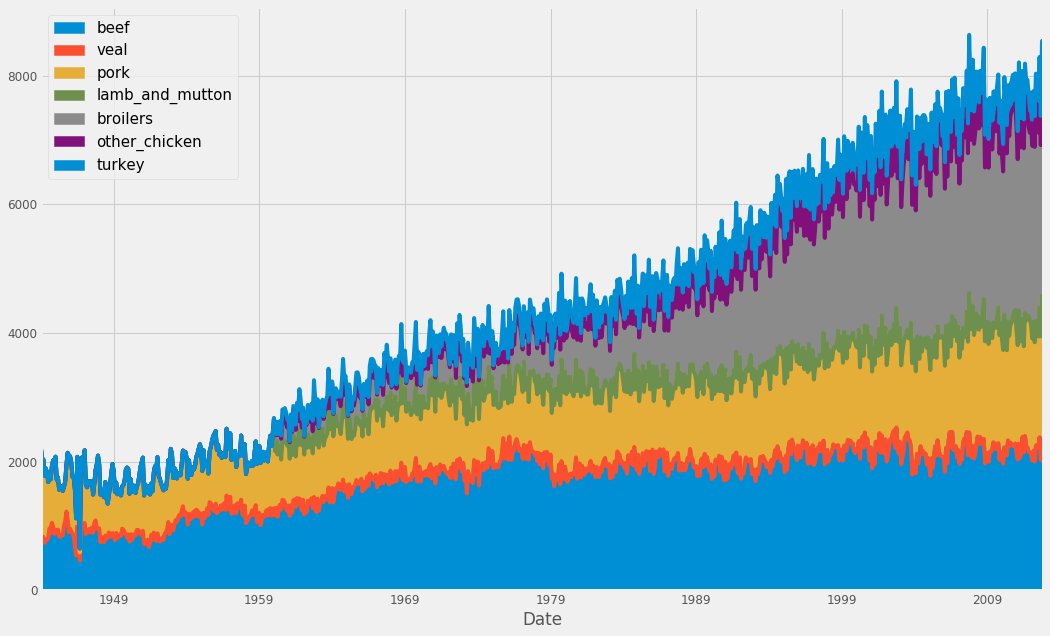

In [118]:
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show();

It looks the time series in the meat DataFrame have very different **growth rates**!

## Statistical summaries of multiple time series

As seen in the last exercise, the time series in the meat DataFrame display very different behavior over time.

Using the summary statistics presented below, can you identify the time series with the highest mean and maximum value, respectively? Answer: beef has the highest mean and broilers has the maximum value.

In [45]:
meat.describe()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


## Define the color palette of your plots

When visualizing multiple time series, `it can be difficult to differentiate between various colors in the default color scheme`.

To remedy this, you can define each color manually, but this may be time-consuming. Fortunately, it is possible to leverage the `colormap` argument to `.plot()` to automatically assign specific color palettes with varying contrasts. You can either provide a matplotlib colormap as an input to this parameter, or provide one of the default strings that is available in the `colormap()` function available in matplotlib (all of which are available [here](https://matplotlib.org/examples/color/colormaps_reference.html)).

For example, you can specify the `'viridis'` colormap using the following command: `df.plot(colormap='viridis')`.

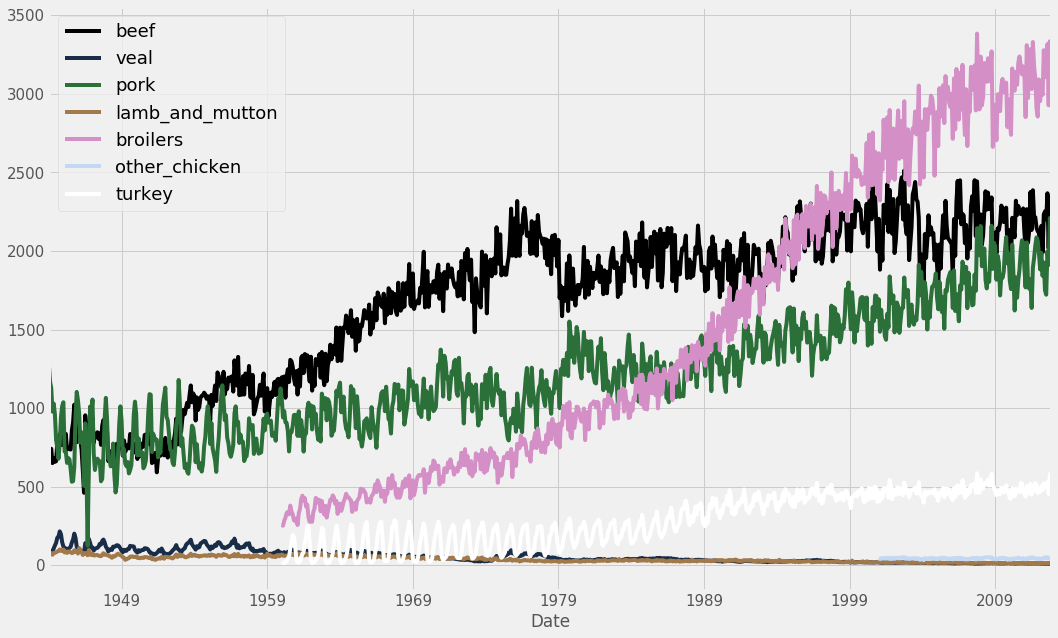

In [46]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show();

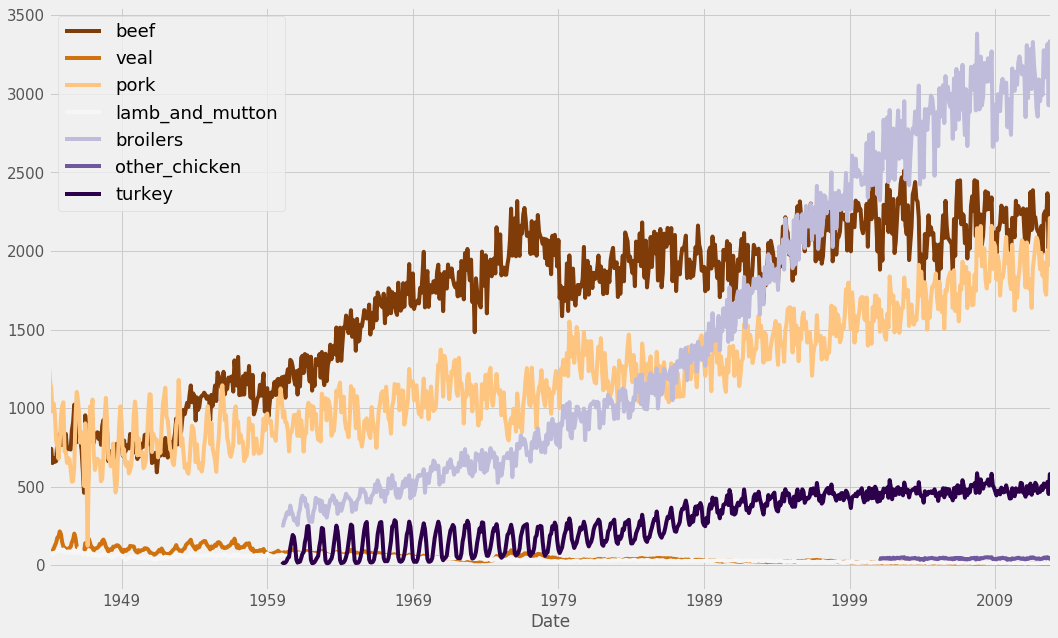

In [47]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show();

Make sure to always consider how readable your plots are before sharing them.

## Add summary statistics to your time series plot

It is possible to visualize time series plots and numerical summaries on one single graph by using the pandas API to matplotlib along with the `table` method:
```
# Plot the time series data in the DataFrame
ax = df.plot()

# Compute summary statistics of the df DataFrame
df_summary = df.describe()

# Add summary table information to the plot
ax.table(cellText=df_summary.values, 
         colWidths=[0.3]*len(df.columns), 
         rowLabels=df_summary.index, 
         colLabels=df_summary.columns, 
         loc='top')
```

In [57]:
meat_mean = meat.agg(['mean'])
meat_mean

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
mean,1683.463362,54.198549,1211.683797,38.360701,1516.58252,43.033566,292.814646


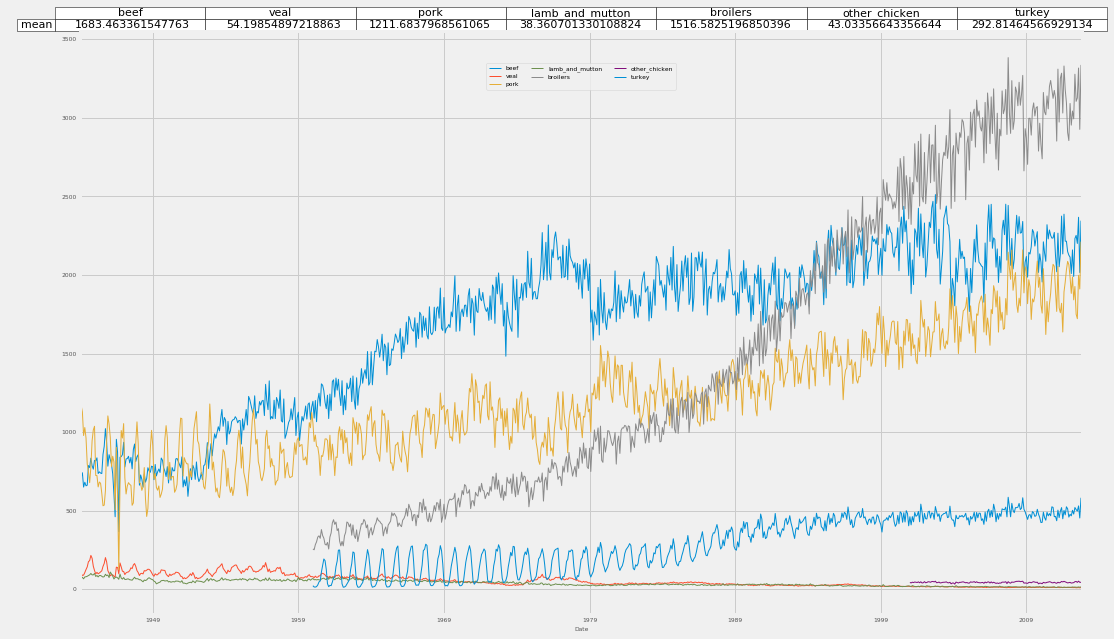

In [58]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show();

## Plot your time series on individual plots

It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in your DataFrame.

It is possible to create a "grid" of individual graphs by "faceting" each time series by setting the subplots argument to True. In addition, the arguments that can be added are:

- **layout**: specifies the number of rows x columns to use.
- **sharex** and **sharey**: specifies whether the x-axis and y-axis values should be shared between your plots.

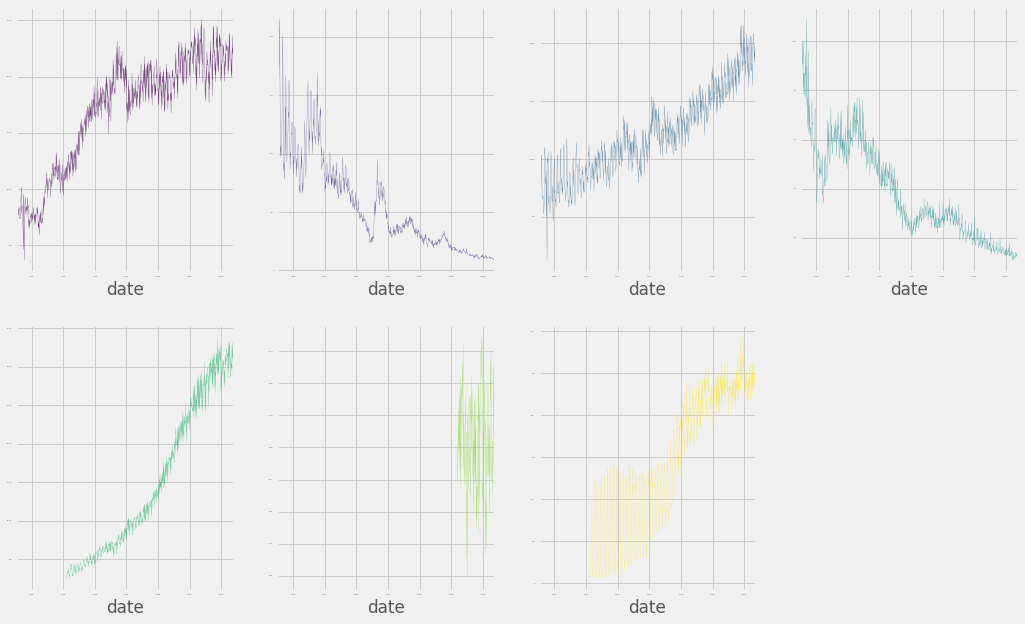

In [61]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2, 4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show();

## Compute correlations between time series

In the field of Statistics, the **correlation coefficient** is a measure used to determine the strength or lack relationship between two variables:

- **Pearson's coefficient** can be used to compute the correlation coefficient between variables for which the relationship is thought to be linear.
- **Jendall Tau** or **Spearman** rank can be used to compute the correlation coefficient between variables for which the relationship is thought to be non-linear.

The **correlation coefficient** can be used to determine how multiple variables (or a group of time series) are associated with one another. The result is a **correlation matrix** that describes the correlation between time series. Note that the diagonal values in a correlation matrix will always be 1, since a time series will always be perfectly correlated with itself.

Correlation coefficients can be computed with the **pearson**, **kendall** and **spearman** methods. A full discussion of these different methods is outside the scope of this course, but the **pearson** method should be used when relationships between your variables are thought to be linear, while the **kendall** and **spearman** methods should be used when relationships between your variables are thought to be non-linear.

In [62]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau
x = [1, 2, 4, 7]
y = [1, 3, 4, 8]
pearsonr(x, y)

(0.9843091327750998, 0.015690867224900207)

In [63]:
spearmanr(x, y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [64]:
kendalltau(x, y)

KendalltauResult(correlation=1.0, pvalue=0.08333333333333333)

In [67]:
# Compute the correlation between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

corr_s = meat[['beef', 'pork']].corr(method='spearman')

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000


In [66]:
type(corr_s)

pandas.core.frame.DataFrame

In [70]:
# Print the correlation between beef and pork columns
print(corr_s.loc['beef'][1])

0.8275872847134006


In [71]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr('pearson'))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

# Print the correlation between pork and turkey columns
print(0.835215)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366
0.835215


## Visualize correlation matrices

The correlation matrix generated in the previous exercise can be plotted using a `heatmap`. To do so, you can leverage the `heatmap()` function from the `seaborn` library which contains several arguments to tailor the look of your heatmap.
```
df_corr = df.corr()

sns.heatmap(df_corr)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
```
You can use the `.xticks()` and `.yticks()` methods to rotate the axis labels so they don't overlap.

To learn about the arguments to the `heatmap()` function, refer to this [page](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

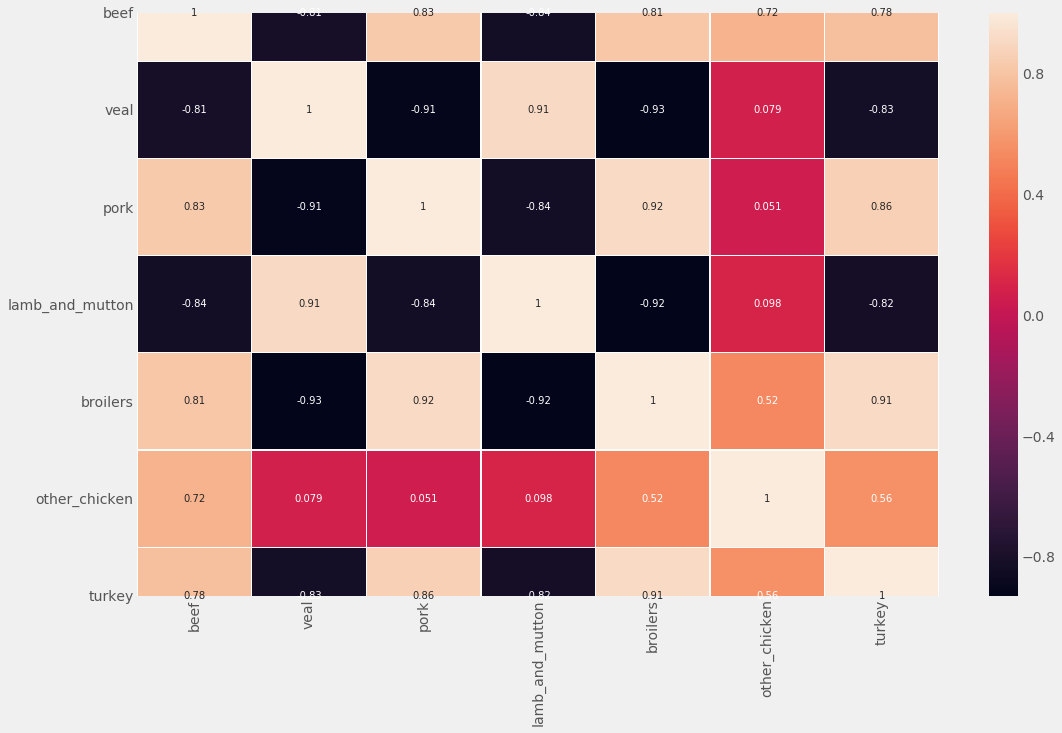

In [72]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show();

## Clustered heatmaps

Heatmaps are extremely useful to visualize a correlation matrix, but `clustermaps` are better. A `Clustermap` allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:
```
df_corr = df.corr()

fig = sns.clustermap(df_corr)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
```
To prevent overlapping of axis labels, you can reference the Axes from the underlying fig object and specify the rotation. You can learn about the arguments to the `clustermap()` function [here](https://seaborn.pydata.org/generated/seaborn.clustermap.html).

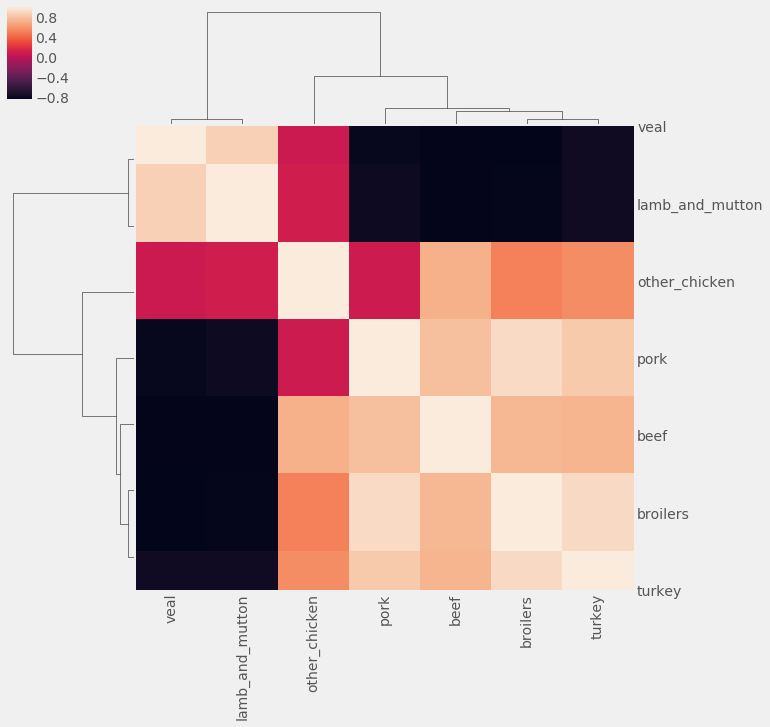

In [73]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show();